In [1]:
import momepy as mm
import geopandas as gpd
import numpy as np

In [2]:
buildings = gpd.read_file(r"I:\BH_DataBase\Madrid\Madrid_buildings.gpkg")

In [4]:
buildings.dropna(inplace=True)

In [5]:
buildings.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 147830 entries, 0 to 155469
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   id           147830 non-null  object  
 1   height       147830 non-null  float64 
 2   age          147830 non-null  float64 
 3   type         147830 non-null  object  
 4   id_source    147830 non-null  object  
 5   type_source  147830 non-null  object  
 6   ndsm_mean    147830 non-null  float64 
 7   ndsm_stdev   147830 non-null  float64 
 8   ndsm_min     147830 non-null  float64 
 9   ndsm_max     147830 non-null  float64 
 10  geometry     147830 non-null  geometry
dtypes: float64(6), geometry(1), object(4)
memory usage: 13.5+ MB


# Raw evaluation

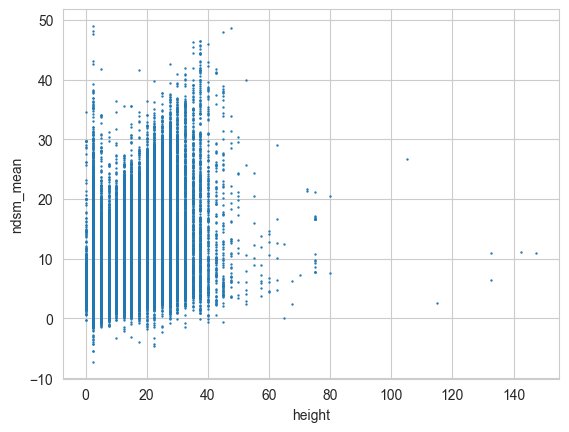

In [8]:
import matplotlib.pyplot as plt
plt.scatter(buildings['height'], buildings['ndsm_mean'], s=0.5)
plt.xlabel('height')
plt.ylabel('ndsm_mean')
plt.show()

In [9]:
# rmse
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(buildings['height'], buildings['ndsm_mean']))
print(rmse)

6.1587459010285945


In [10]:
# r2
from sklearn.metrics import r2_score
r2 = r2_score(buildings['height'], buildings['ndsm_mean'])
print(r2)

0.2526005840667567


# Process

In [11]:
copy = buildings.copy()

In [12]:
copy = copy.explode().reset_index(drop=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5280\360806111.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  copy = copy.explode().reset_index(drop=True)


In [13]:
copy['id'] = copy.index

In [16]:
# drop columns id_source,type_source
copy.drop(columns=['id_source', 'type_source'], inplace=True)
copy

,id,height,age,type,ndsm_mean,ndsm_stdev,ndsm_min,ndsm_max,geometry
0,0,2.5,2000.0,residential,4.798286,0.088343,4.770020,4.919983,"POLYGON ((3147236.260 2050240.056, 3147239.537..."
1,1,7.5,2000.0,residential,4.788785,0.098979,4.739990,4.919983,"POLYGON ((3147235.313 2050243.353, 3147233.145..."
2,2,0.0,2002.0,residential,4.788731,0.093748,4.770020,4.919983,"POLYGON ((3147242.687 2050233.051, 3147241.021..."
3,3,7.5,2002.0,residential,4.919983,0.000000,4.919983,4.919983,"POLYGON ((3147249.439 2050243.941, 3147246.028..."
4,4,7.5,2000.0,residential,4.919983,0.000000,4.919983,4.919983,"POLYGON ((3147248.238 2050266.100, 3147256.448..."
...,...,...,...,...,...,...,...,...,...
147825,147825,0.0,2008.0,residential,3.309998,0.000000,3.309998,3.309998,"POLYGON ((3170930.744 2047829.963, 3170932.675..."
147826,147826,7.5,2008.0,residential,3.369464,0.106591,3.219971,3.460022,"POLYGON ((3170944.699 2047826.857, 3170946.682..."
147827,147827,2.5,2008.0,residential,3.135824,0.198029,2.890015,3.270020,"POLYGON ((3170975.309 2047700.803, 3170972.545..."
147828,147828,7.5,2008.0,residential,0.096751,1.962964,-0.640015,3.270020,"POLYGON ((3170968.556 2047728.375, 3170971.381..."


## building merics

In [17]:
copy['area'] = mm.Area(copy).series
copy['perimeter'] = copy.length
copy['fractal'] = mm.FractalDimension(copy, 'area', 'perimeter').series
copy['compactness'] = mm.SquareCompactness(copy, 'area', 'perimeter').series
copy['elongation'] = mm.Elongation(copy).series
copy['ccd_stdev'] = mm.CentroidCorners(copy).std
copy['ccd_means'] = mm.CentroidCorners(copy).mean
copy['longest_axis'] = mm.LongestAxisLength(copy).series
copy['convexity'] = mm.Convexity(copy).series
copy['shape_index'] = mm.ShapeIndex(copy,longest_axis='elongation').series
copy['orientation'] = mm.Orientation(copy).series
copy['corners'] = mm.Corners(copy).series

  0%|          | 0/147830 [00:00<?, ?it/s]

C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\momepy\shape.py:1168: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(cosine_angle)


  0%|          | 0/147830 [00:00<?, ?it/s]

C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\momepy\shape.py:1168: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(cosine_angle)
C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\momepy\shape.py:826: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(cosine_angle)


In [18]:
copy

,id,height,age,type,ndsm_mean,ndsm_stdev,ndsm_min,ndsm_max,geometry,area,...,fractal,compactness,elongation,ccd_stdev,ccd_means,longest_axis,convexity,shape_index,orientation,corners
0,0,2.5,2000.0,residential,4.798286,0.088343,4.770020,4.919983,"POLYGON ((3147236.260 2050240.056, 3147239.537...",18.959422,...,1.032772,0.908078,0.510917,0.289048,3.335479,7.192781,1.000000,9.616512,1.105878,4
1,1,7.5,2000.0,residential,4.788785,0.098979,4.739990,4.919983,"POLYGON ((3147235.313 2050243.353, 3147233.145...",67.723867,...,1.009959,0.958889,0.702785,0.481780,5.573516,12.062927,0.975896,13.213062,0.204682,8
2,2,0.0,2002.0,residential,4.788731,0.093748,4.770020,4.919983,"POLYGON ((3147242.687 2050233.051, 3147241.021...",28.092753,...,0.997477,1.008450,0.895975,0.206366,3.726092,7.810805,1.000000,6.675077,1.622011,4
3,3,7.5,2002.0,residential,4.919983,0.000000,4.919983,4.919983,"POLYGON ((3147249.439 2050243.941, 3147246.028...",72.873319,...,1.007789,0.967149,0.693646,0.477810,5.769839,12.282601,0.980310,13.886776,1.874105,8
4,4,7.5,2000.0,residential,4.919983,0.000000,4.919983,4.919983,"POLYGON ((3147248.238 2050266.100, 3147256.448...",87.380688,...,1.027926,0.882641,0.557960,0.800693,6.379686,14.162956,0.961400,18.904254,0.607310,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147825,147825,0.0,2008.0,residential,3.309998,0.000000,3.309998,3.309998,"POLYGON ((3170930.744 2047829.963, 3170932.675...",52.076683,...,1.065290,0.772539,0.634844,0.799858,6.388175,13.510636,1.000000,12.826550,9.930356,4
147826,147826,7.5,2008.0,residential,3.369464,0.106591,3.219971,3.460022,"POLYGON ((3170944.699 2047826.857, 3170946.682...",230.537698,...,1.062332,0.712401,0.943650,2.348039,8.652691,22.807305,0.854422,18.155778,15.887182,12
147827,147827,2.5,2008.0,residential,3.135824,0.198029,2.890015,3.270020,"POLYGON ((3170975.309 2047700.803, 3170972.545...",30.399241,...,1.000009,0.999968,0.991435,0.015520,3.898700,7.828441,1.000000,6.275122,29.643197,4
147828,147828,7.5,2008.0,residential,0.096751,1.962964,-0.640015,3.270020,"POLYGON ((3170968.556 2047728.375, 3170971.381...",210.093658,...,1.079886,0.652338,0.660211,2.320905,8.008219,22.793740,0.864339,24.772992,26.905481,14


In [20]:
import libpysal
dist200 = libpysal.weights.DistanceBand.from_dataframe(copy, 200,
                                                       ids='id')
dist100 = libpysal.weights.DistanceBand.from_dataframe(copy, 100,
                                                       ids='id')
dist50 = libpysal.weights.DistanceBand.from_dataframe(copy, 50,
                                                       ids='id')

C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 292 disconnected components.
 There are 91 islands with ids: 111, 112, 6837, 7342, 7343, 15447, 15448, 18491, 20300, 20337, 23787, 25360, 32827, 32927, 33059, 33075, 34120, 34122, 39439, 45469, 45470, 45471, 45472, 45512, 45523, 45595, 45598, 45599, 45600, 45661, 45834, 45869, 45973, 45982, 45983, 45991, 45995, 46008, 46026, 46027, 46028, 46029, 46039, 46041, 46051, 46052, 46062, 46068, 46072, 46085, 46086, 46087, 46132, 46187, 46342, 46351, 46352, 60976, 64405, 75128, 75129, 86452, 88490, 94282, 96992, 97138, 97139, 99305, 99355, 106004, 106006, 111236, 113716, 114655, 114656, 117955, 118364, 123606, 126827, 127918, 129209, 130643, 135411, 135412, 141372, 142444, 147352, 147353, 147358, 147806, 147807.
  warnings.warn(message)
C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\libpysal\weights\weights.py:172: UserWarn

In [23]:
copy['neighbours_200'] = mm.Neighbors(copy, dist200,'id').series
copy['neighbours_100'] = mm.Neighbors(copy, dist100,'id').series
copy['neighbours_50'] = mm.Neighbors(copy, dist50,'id').series
copy['adjacency_200'] = mm.BuildingAdjacency(copy, dist200,'id').series
copy['adjacency_100'] = mm.BuildingAdjacency(copy, dist100,'id').series
copy['adjacency_50'] = mm.BuildingAdjacency(copy, dist50,'id').series

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

Calculating spatial weights...
Spatial weights ready...


Calculating adjacency:   0%|          | 0/147830 [00:00<?, ?it/s]

Calculating spatial weights...
Spatial weights ready...


Calculating adjacency:   0%|          | 0/147830 [00:00<?, ?it/s]

Calculating spatial weights...
Spatial weights ready...


Calculating adjacency:   0%|          | 0/147830 [00:00<?, ?it/s]

In [24]:
copy['area_100'] = mm.AverageCharacter(copy,'area',dist100,'id').mean
copy['perimeter_100'] = mm.AverageCharacter(copy,'perimeter',dist100,'id').mean
copy['shape_index_100'] = mm.AverageCharacter(copy,'shape_index',dist100,'id').mean
copy['area_200'] = mm.AverageCharacter(copy,'area',dist200,'id').mean
copy['perimeter_200'] = mm.AverageCharacter(copy,'perimeter',dist200,'id').mean
copy['shape_index_200'] = mm.AverageCharacter(copy,'shape_index',dist200,'id').mean
copy['area_50'] = mm.AverageCharacter(copy,'area',dist50,'id').mean
copy['perimeter_50'] = mm.AverageCharacter(copy,'perimeter',dist50,'id').mean
copy['shape_index_50'] = mm.AverageCharacter(copy,'shape_index',dist50,'id').mean

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

In [25]:
copy['ndsm_mean_50'] = mm.AverageCharacter(copy,'ndsm_mean',dist50,'id').mean
copy['ndsm_mean_100'] = mm.AverageCharacter(copy,'ndsm_mean',dist100,'id').mean
copy['ndsm_mean_200'] = mm.AverageCharacter(copy,'ndsm_mean',dist200,'id').mean
copy['ndsm_min_50'] = mm.AverageCharacter(copy,'ndsm_min',dist50,'id').mean
copy['ndsm_min_100'] = mm.AverageCharacter(copy,'ndsm_min',dist100,'id').mean
copy['ndsm_min_200'] = mm.AverageCharacter(copy,'ndsm_min',dist200,'id').mean
copy['ndsm_max_50'] = mm.AverageCharacter(copy,'ndsm_max',dist50,'id').mean
copy['ndsm_max_100'] = mm.AverageCharacter(copy,'ndsm_max',dist100,'id').mean
copy['ndsm_max_200'] = mm.AverageCharacter(copy,'ndsm_max',dist200,'id').mean

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

  0%|          | 0/147830 [00:00<?, ?it/s]

# Train model

In [26]:
# rf model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [27]:
copy.fillna(0, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5280\3847152646.py:1: DeprecationWarning: ExtensionArray.fillna added a 'copy' keyword in pandas 2.1.0. In a future version, ExtensionArray subclasses will need to implement this keyword or an exception will be raised. In the interim, the keyword is ignored by GeometryArray.
  copy.fillna(0, inplace=True)


In [71]:
#  train test split
X = copy.drop(columns=['height', 'geometry', 'id','type','age'])
y = copy['height']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# train model
rf = RandomForestRegressor(n_estimators=300, random_state=42,n_jobs=6)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=6, random_state=42)

In [66]:
# predict
y_pred = rf.predict(X_test)

In [67]:
# rmse
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

3.7820999930849455


In [68]:
# r2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7161567372280733


In [69]:
len(y_test)

44349

In [35]:
# feature importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

In [36]:
indices = np.argsort(importances)[::-1]

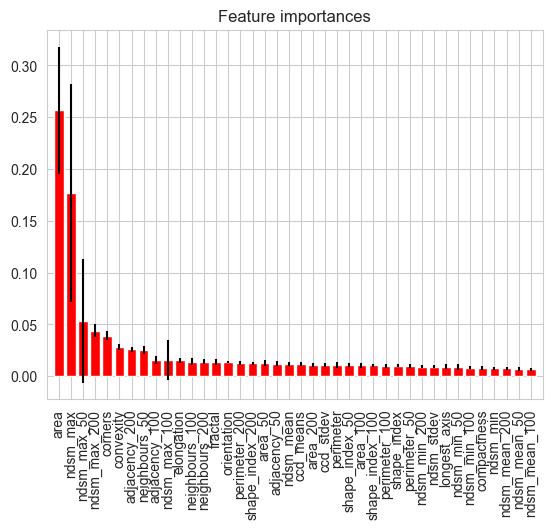

In [37]:
# plot feature importance
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [39]:
y_pred

array([14.15      ,  9.65833333,  9.75      , ...,  6.96666667,
       12.29166667,  5.59166667])

(array([9.000e+00, 2.100e+01, 3.560e+02, 4.811e+03, 1.103e+03, 1.000e+03,
        3.568e+03, 2.107e+03, 2.248e+03, 2.667e+03, 1.615e+03, 1.624e+03,
        2.032e+03, 2.215e+03, 2.106e+03, 2.145e+03, 2.140e+03, 1.763e+03,
        1.436e+03, 1.276e+03, 9.770e+02, 9.870e+02, 8.700e+02, 8.360e+02,
        7.550e+02, 6.460e+02, 5.510e+02, 4.640e+02, 3.650e+02, 2.880e+02,
        2.710e+02, 1.860e+02, 1.710e+02, 1.510e+02, 1.180e+02, 8.000e+01,
        8.200e+01, 5.500e+01, 5.100e+01, 4.500e+01, 3.000e+01, 2.500e+01,
        2.200e+01, 1.600e+01, 1.400e+01, 1.100e+01, 7.000e+00, 1.100e+01,
        6.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

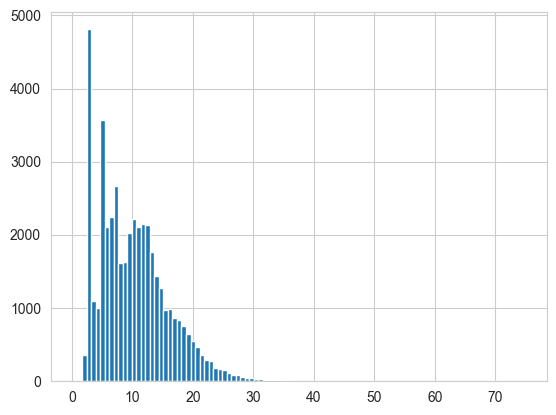

In [43]:
# hist 
plt.hist(y_pred, bins=100)

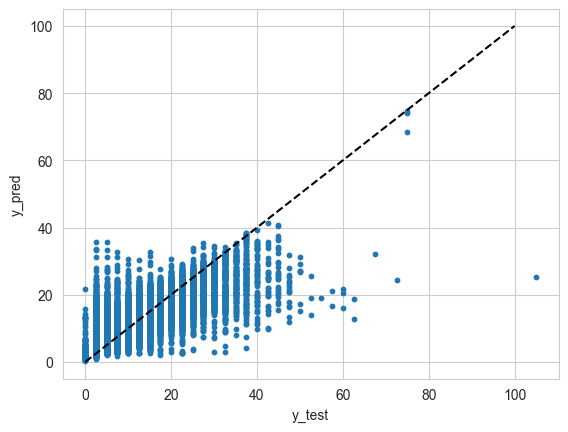

In [44]:
# scatter plot
plt.scatter(y_test, y_pred, s=10)
plt.xlabel('y_test')
plt.ylabel('y_pred')
# 1:1 line
plt.plot([0, 100], [0, 100], '--k')
plt.show()

In [45]:
# train, test, validation split
X = copy.drop(columns=['height', 'geometry', 'id','type','age'])
y = copy['height']

In [52]:
# y_test y_pred export to csv
import pandas as pd
y_test = pd.DataFrame(y_test*2.5)
y_test['y_pred'] = y_pred
y_test.to_csv(r'I:\BH_DataBase\Madrid\Scatter.csv')

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'y_pred'}>]], dtype=object)

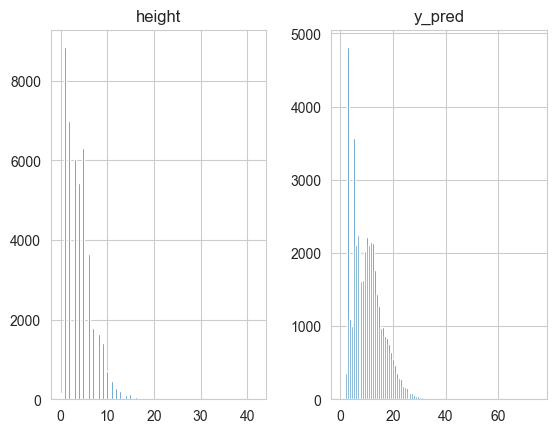

In [51]:
y_test.hist(bins=100)

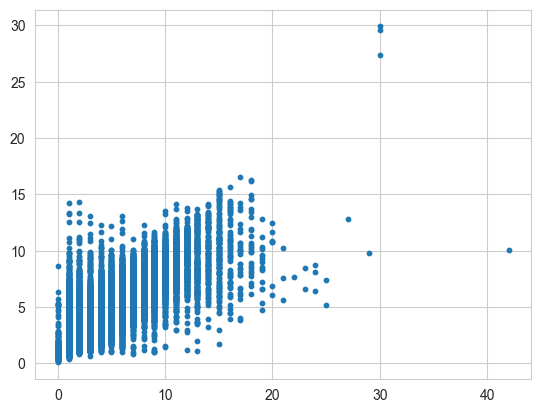

In [48]:
# scatter plot
plt.scatter(y_test['height']/2.5, y_test['y_pred']/2.5, s=10)

In [1]:
# read csv
import pandas as pd
scatter = pd.read_csv(r'I:\BH_DataBase\Madrid\Scatter.csv')

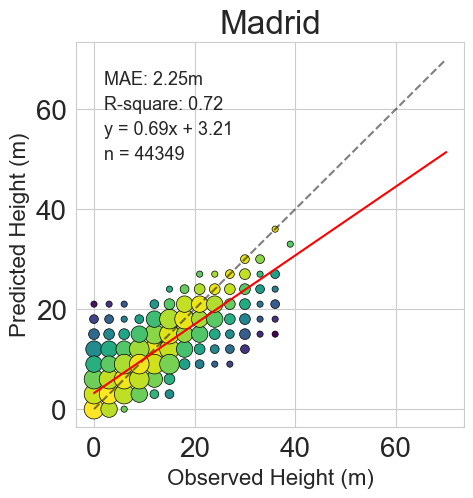

In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
#font size
plt.rcParams.update({'font.size': 20,'axes.labelsize': 16})
# arial font
plt.rcParams['font.family'] = 'Arial'
result_gdf = scatter.copy()
result_gdf['pred_reclass'] = result_gdf['y_pred'].apply(lambda x: int(x/3)*3)
result_gdf['building_height_ref_reclass'] = result_gdf['height'].apply(lambda x: int(x/3)*3)
result_gdf['reclass'] = result_gdf['pred_reclass'].astype(str) + '_' + result_gdf['building_height_ref_reclass'].astype(str)
result_gdf['residual'] = result_gdf['y_pred'] - result_gdf['height']
result_gdf['residual_abs'] = result_gdf['residual'].abs()
stat_df = result_gdf.groupby(['reclass'])['residual_abs'].agg(['mean','count'])
stat_df.reset_index(inplace=True)
stat_df = stat_df[stat_df['count']>10]
stat_df['pred'] = stat_df['reclass'].apply(lambda x: x.split('_')[0]).astype(int)
stat_df['ref'] = stat_df['reclass'].apply(lambda x: x.split('_')[1]).astype(int)
# reclass the count to 5 classes with equal interval
stat_df['count_reclass'] = pd.qcut(stat_df['count'],5,labels=[1,2,3,7,10])
stat_df['count_reclass'] = stat_df['count_reclass'].astype(int)
# iterate the grid and plot
plt.scatter(stat_df['ref'],stat_df['pred'],c=stat_df['mean'],s=stat_df['count_reclass']*20,cmap='viridis_r',edgecolors='black',linewidths=0.5)
plt.xlabel('Observed Height (m)',fontsize=16)
plt.ylabel('Predicted Height (m)',fontsize=16)
plt.title('Madrid')
# line 
plt.plot([0,70],[0,70],color='black',linestyle='--',alpha=0.5)
# label rmse,r2,fitted formula with 1st order and the coefficient of determination, and the number of samples
mae = (mean_absolute_error(result_gdf['height'], result_gdf['y_pred']))
r2 = r2_score(result_gdf['height'], result_gdf['y_pred'])
fitted_line = np.polyfit(result_gdf['height'], result_gdf['y_pred'], 1)
n = len(result_gdf)
plt.text(2,65,'MAE: {0:.2f}m'.format(mae),fontsize=13)
plt.text(2,60,'R-square: {0:.2f}'.format(r2),fontsize=13)
plt.text(2,55,'y = {0:.2f}x + {1:.2f}'.format(fitted_line[0],fitted_line[1]),fontsize=13)
plt.text(2,50,'n = {0}'.format(n),fontsize=13)
#plot the 1st order fitted line and the coefficient of determination
plt.plot([0,70],[fitted_line[1],fitted_line[0]*70+fitted_line[1]],color='red')
plt.savefig(r'I:\BH_DataBase\Madrid\Scatter.png',dpi=300,bbox_inches='tight')